In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [12]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


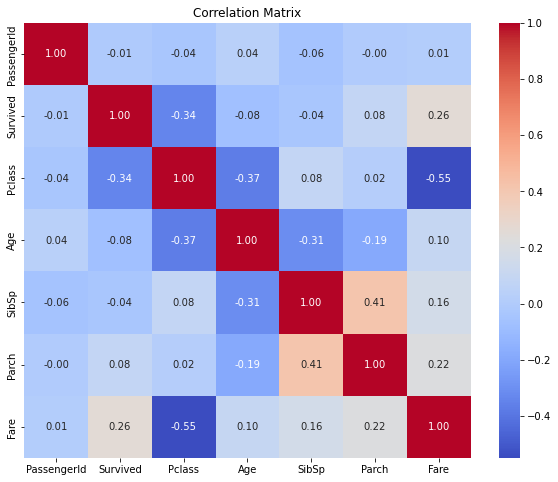

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
#Removing Cabin as 77% of the column is null. Ticket, Name, Age and Fare doesn't contribute much as well.
passenger_ids = df[["PassengerId"]]
df_removed_fields = df.drop(['Cabin','Ticket','Name', 'Age','PassengerId'], axis=1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
fare_column = df_removed_fields['Fare']
scaler = MinMaxScaler()
fare_column_reshaped = fare_column.values.reshape(-1, 1)
fare_column_scaled = scaler.fit_transform(fare_column_reshaped)
df_removed_fields['Fare'] = fare_column_scaled

In [18]:
df_removed_fields.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,0.014151,S
1,1,1,female,1,0,0.139136,C
2,1,3,female,0,0,0.015469,S
3,1,1,female,1,0,0.103644,S
4,0,3,male,0,0,0.015713,S


In [19]:
df_removed_fields.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
one_hot_encoded_sex = pd.get_dummies(df['Sex'], prefix='Sex')
one_hot_encoded_sex

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [21]:
one_hot_encoded_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked')
one_hot_encoded_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [22]:
df_encoded = pd.concat([df_removed_fields, one_hot_encoded_sex, one_hot_encoded_embarked], axis=1)
df_encoded

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,1,0,0.014151,S,0,1,0,0,1
1,1,1,female,1,0,0.139136,C,1,0,1,0,0
2,1,3,female,0,0,0.015469,S,1,0,0,0,1
3,1,1,female,1,0,0.103644,S,1,0,0,0,1
4,0,3,male,0,0,0.015713,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,0.025374,S,0,1,0,0,1
887,1,1,female,0,0,0.058556,S,1,0,0,0,1
888,0,3,female,1,2,0.045771,S,1,0,0,0,1
889,1,1,male,0,0,0.058556,C,0,1,1,0,0


In [23]:
df_encoded_final = df_encoded.drop(['Sex','Embarked'], axis=1)
df_encoded_final

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,0.014151,0,1,0,0,1
1,1,1,1,0,0.139136,1,0,1,0,0
2,1,3,0,0,0.015469,1,0,0,0,1
3,1,1,1,0,0.103644,1,0,0,0,1
4,0,3,0,0,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0.025374,0,1,0,0,1
887,1,1,0,0,0.058556,1,0,0,0,1
888,0,3,1,2,0.045771,1,0,0,0,1
889,1,1,0,0,0.058556,0,1,1,0,0


In [24]:
df_encoded_final.isnull().sum()

Survived      0
Pclass        0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

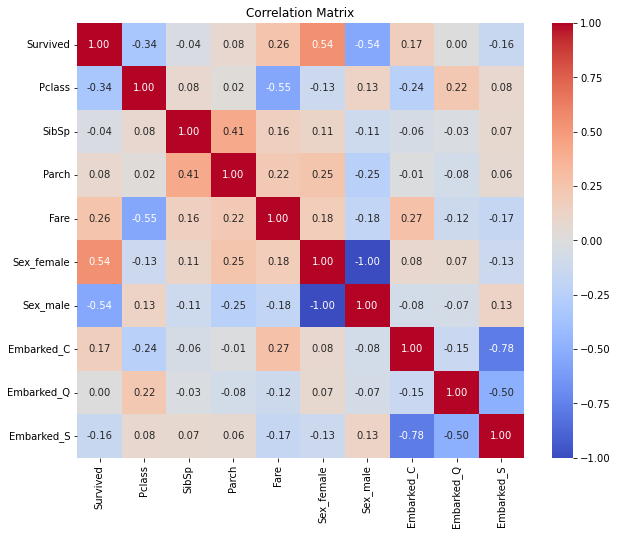

In [25]:
# Calculate the correlation matrix
correlation_matrix = df_encoded_final.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [26]:
X, y = df_encoded_final.drop(columns=['Survived']), df_encoded_final[['Survived']]

In [27]:
X

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0.014151,0,1,0,0,1
1,1,1,0,0.139136,1,0,1,0,0
2,3,0,0,0.015469,1,0,0,0,1
3,1,1,0,0.103644,1,0,0,0,1
4,3,0,0,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,0,0.025374,0,1,0,0,1
887,1,0,0,0.058556,1,0,0,0,1
888,3,1,2,0.045771,1,0,0,0,1
889,1,0,0,0.058556,0,1,1,0,0


In [28]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (712, 9) (712, 1)
Testing set shape: (179, 9) (179, 1)


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
23/23 [==============================] - 2s 20ms/step - loss: 0.6160 - accuracy: 0.6503 - val_loss: 0.5744 - val_accuracy: 0.6816
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5295 - accuracy: 0.7683 - val_loss: 0.4862 - val_accuracy: 0.7877
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4792 - accuracy: 0.8104 - val_loss: 0.4706 - val_accuracy: 0.7765
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4664 - accuracy: 0.8006 - val_loss: 0.4482 - val_accuracy: 0.7821
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4579 - accuracy: 0.8006 - val_loss: 0.4547 - val_accuracy: 0.7765
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4508 - accuracy: 0.8062 - val_loss: 0.4443 - val_accuracy: 0.7765
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4466 - accuracy: 0.8062 - val_loss: 0.4319 - val_accuracy: 0.7989
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.8357 - val_loss: 0.4641 - val_accuracy: 0.7933
Epoch 60/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3904 - accuracy: 0.8343 - val_loss: 0.4641 - val_accuracy: 0.7989
Epoch 61/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3890 - accuracy: 0.8301 - val_loss: 0.4688 - val_accuracy: 0.7933
Epoch 62/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.8329 - val_loss: 0.4525 - val_accuracy: 0.7989
Epoch 63/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3923 - accuracy: 0.8272 - val_loss: 0.4617 - val_accuracy: 0.7933
Epoch 64/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3884 - accuracy: 0.8385 - val_loss: 0.4538 - val_accuracy: 0.7989
Epoch 65/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3865 - accuracy: 0.8329 - val_loss: 0.4643 - val_accuracy: 0.8045
Epoch 

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)


In [37]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/1000
6/6 [==============================] - 0s 32ms/step - loss: 0.3520 - accuracy: 0.8511 - val_loss: 0.5053 - val_accuracy: 0.7989
Epoch 2/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.3513 - accuracy: 0.8511 - val_loss: 0.5047 - val_accuracy: 0.7989
Epoch 3/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.3514 - accuracy: 0.8511 - val_loss: 0.5051 - val_accuracy: 0.7989
Epoch 4/1000
6/6 [==============================] - 0s 14ms/step - loss: 0.3519 - accuracy: 0.8511 - val_loss: 0.5055 - val_accuracy: 0.7989
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.3511 - accuracy: 0.8511 - val_loss: 0.5040 - val_accuracy: 0.7989
Epoch 6/1000
6/6 [==============================] - 0s 13ms/step - loss: 0.3519 - accuracy: 0.8497 - val_loss: 0.5014 - val_accuracy: 0.8045
Epoch 7/1000
6/6 [==============================] - 0s 12ms/step - loss: 0.3510 - accuracy: 0.8511 - val_loss: 0.5049 - val_accuracy: 0.7989
Epoch 8/1000


In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

6/6 [==============================] - 0s 5ms/step - loss: 0.5014 - accuracy: 0.8045
Test accuracy: 0.8044692873954773


In [39]:
df_test_data = pd.read_csv("test.csv")
df_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
passenger_id = df_test_data[['PassengerId']]
df_removed_fields = df_test_data.drop(['Cabin','Ticket','Name', 'Age','PassengerId'], axis=1)

fare_column = df_removed_fields['Fare']
scaler = MinMaxScaler()
fare_column_reshaped = fare_column.values.reshape(-1, 1)
fare_column_scaled = scaler.fit_transform(fare_column_reshaped)
df_removed_fields['Fare'] = fare_column_scaled

one_hot_encoded_sex = pd.get_dummies(df_test_data['Sex'], prefix='Sex')
one_hot_encoded_embarked = pd.get_dummies(df_test_data['Embarked'], prefix='Embarked')
df_encoded = pd.concat([df_removed_fields, one_hot_encoded_sex, one_hot_encoded_embarked], axis=1)
df_encoded_final = df_encoded.drop(['Sex','Embarked'], axis=1)
X= df_encoded_final

In [45]:
X

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,0.015282,0,1,0,1,0
1,3,1,0,0.013663,1,0,0,0,1
2,2,0,0,0.018909,0,1,0,1,0
3,3,0,0,0.016908,0,1,0,0,1
4,3,1,1,0.023984,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,0,0.015713,0,1,0,0,1
414,1,0,0,0.212559,1,0,1,0,0
415,3,0,0,0.014151,0,1,0,0,1
416,3,0,0,0.015713,0,1,0,0,1


In [46]:
predicted_values = model.predict(X)
pred_array_binary = (predicted_values > 0.5).astype(int)

print(pred_array_binary)


14/14 [==============================] - 0s 3ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [

In [47]:
df_pred = pd.DataFrame(pred_array_binary, columns=['Predicted_Survived'])


In [48]:
df_final = pd.concat([passenger_id, df_pred], axis=1)
df_final

,PassengerId,Predicted_Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
df_final.to_csv("result_survival.csv")